Notebook from this talk: https://www.youtube.com/watch?v=7fsreJMy_pI
<br>Code is from the talk
<br>Talk was about a previous version of the package, so I updated it (and tried to note for clarification) where I changed things

In [ ]:
%reload_ext watermark
%watermark -p pandas,networkx,numpy,matplotlib -v -n

# Creating Graphs in NetworkX

- Creating a graph object
- Adding nodes and edges
- Adding attributes
- Loading in several data types

In [3]:
import csv

import networkx as nx 
import pandas as pd 
import matplotlib.pyplot as plt 
%matplotlib inline

In [73]:
# Using the graph constructor to create an empty graph stored as G
G = nx.Graph()


In [74]:
# Adding nodes
#Either one at a time, here a node named "1"
G.add_node(1)
#More than one at a time
G.add_nodes_from([2, 3])
G.add_node(4)

In [75]:
G.nodes()

NodeView((1, 2, 3, 4))

⚠️  
**Note**: In `networkx 2.0`, several methods now return iterators

For more details see: https://networkx.github.io/documentation/development/reference/migration_guide_from_1.x_to_2.0.html

In [76]:
# adding an edge to the graph
# listing the nodes I want connected with the edge

G.add_edge(1, 2)

In [77]:
# get graph info
#string with basic info
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 4
Number of edges: 1
Average degree:   0.5000


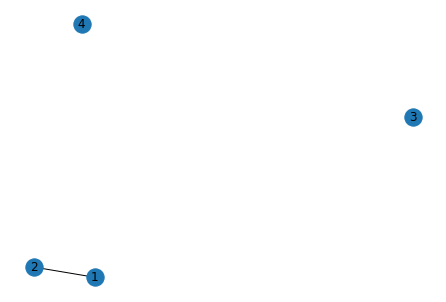

In [78]:
nx.draw(G, with_labels=True)

## Adding and Inspecting Attributes

In [83]:
# add new attributes at creation
# Adding a single new node with a favorite_color attribute
G.add_node(5, favorite_color='blue')
#Adding a few new nodes with an attribute by passing a list
G.add_nodes_from([(6, {'favorite_color' : 'red'}),
                  (7, {'favorite_color' :'purple'})])

# Adding an attribute to an edge at its creation
# talk says to use the code
#G.add_edge(5, 6, {'relationship' : 'best friends'})
#it throws an error, but this works:
G.add_edge(5, 6, relationship = 'best friends')

In [84]:
# accessing node attributes
#here accessing the attributes of node 5
#talk says to use the code
#print("Node 5 attributes:", G.node[5])
#but the current package version requires it to be 'nodes' and not 'node'
print("Node 5 attributes:", G.nodes[5])

# accessing edge attributes
# talk says to use the code
#print("Edge 5-6 attributes:", G.edge[5], [6])
#it throws an error, but this works:
print("Edge 5-6 attributes:", G.edges(5, 6))
#However it doesn't add the attribute data
#to get that we need
print("Edge 5-6 attributes:", G.get_edge_data(5, 6))

Node 5 attributes: {'favorite_color': 'blue'}
Edge 5-6 attributes: [(5, 6, None)]
Edge 5-6 attributes: {'relationship': 'best friends'}


### Adding Attributes for each existing node

In [86]:
#Adding information to the network with an attribute dictionary
#Key is node label
#attribute is the value that we want to add to that node
favorite_foods = {
    1 : 'pizza',
    2 : 'mac and cheese',
    3 : 'balogna sandwich',
    4 : 'pizza',
    5 : 'chocolate',
    6 : 'pizza',
    7 : 'bananas'
}

In [88]:
#Passing the name of the graph, the name of the dictionary where the attributes live, and what we want to call that attribute that we're passing to the nodes
#Past version was graph name, desired attribute name, dictionary name
#nx.set_node_attributes(G, 'favorite_food', favorite_foods)
nx.set_node_attributes(G, favorite_foods, 'favorite_food')

In [90]:
#Previous version was G.node, current version is G.nodes
print("Node 4's favorite food is %s" % G.nodes[4]['favorite_food'])

Node 4's favorite food is pizza


## Reading in Different Representations of Graphs
Data for graphs and networks comes in many different representations.

__Representations__:
- Edge List
- Adjacency Matrix
- Adjacency List (not covered)
- Incidence Matrix (not covered)

__Note__: Representations are related to, but distinct from, the storage format. In our examples, we'll be loading our data from text files. You may also have network data stored as `JSON`, `GEXF`, or other formats. For more details, [check the docs](http://networkx.readthedocs.io/en/latest/reference/readwrite.html).

### Grey's Anatomy Dataset
![greys anatomy](http://www.netflixupdate.com/wp-content/uploads/2015/08/Greys-Anatomy-on-Netflix.jpg)

The dataset we'll look at is a record of all "romantic" encounters between characters on the TV show Grey's Anatomy.

### Edge Lists

An edge list is a common way of representing a graph. This representation can be thought of as a list of tuples, where each tuple represents an edge between two of the nodes in your graph. The nodes of the graph can be inferred by taking the set of objects from all tuples.

You can infer/determine whether a graph is directed or weighted from an edge list.
- __Weighted__: If edges appear more than once, or if an additional weight attribute is added as a 3rd column, the graph is weighted
- __Directed__: If the "From" and "To" (often seen as "Source" and "Target") of an edge in the list is not arbitrary, it's a directed graph

In [95]:
# what does it look like? 
#my data are in the same folder as my notebook
#got the data from the github of the talk that they mention at the beginning of the video
!head ga_edgelist.csv

"from","to"
"lexi","sloan"
"lexi","karev"
"owen","yang"
"owen","altman"
"sloan","torres"
"sloan","altman"
"torres","arizona"
"torres","karev"
"derek","grey"


In [96]:
#reading the data in with the csv library
#skipping the header row with next() 
#since it's just 'from' and 'to'
#and we obviously don't want those as nodes in our graph
#making a list out of all the edges
edges = []
with open('ga_edgelist.csv', 'r') as f:
    filereader = csv.reader(f, delimiter=",", quotechar='"')
    next(filereader) # skips header row
    for row in filereader:
            edges.append(row)

In [108]:
#examining the first 5 edges
edges[0:5]

[['lexi', 'sloan'],
 ['lexi', 'karev'],
 ['owen', 'yang'],
 ['owen', 'altman'],
 ['sloan', 'torres']]

In [109]:
#creating a graph object from the edgelist
GA = nx.from_edgelist(edges)

In [110]:
print(nx.info(GA))
#average degree is average number of partners
#which I assume is the same as average number of connections

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


### Mediating Data Processing through `pandas`

Often times the data we'll want to use will probably be analyzed beforehand with `pandas`. Reading in our data to a `DataFrame` first saves us a bit of time writng code to open the files due to `read_csv` having sensible defaults around quoted characters and header rows.

In [111]:
#We can skip the header row if we just import the data into python
#and massage it there with something like pandas
#reading the csv into a pandas dataframe
ga_edges = pd.read_csv('ga_edgelist.csv')

ga_edges.head()

,from,to
0,lexi,sloan
1,lexi,karev
2,owen,yang
3,owen,altman
4,sloan,torres


In [112]:
#when creating a graph object from a pandas dataframe
#Passing the method the data frame name, and the source--the starting node, and target--the ending node
#Here the graph is undirected, so it doesn't really matter
#But it would matter if the graph was directed
#video says to use from_pandas_dataframe
#but this was changed to from_pandas_edgelist in the package's newer version
GA = nx.from_pandas_edgelist(ga_edges, source="from", target="to")


In [113]:
# validate info

print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


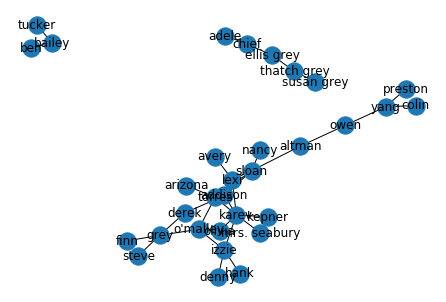

In [114]:
nx.draw(GA, with_labels=True)

### Adjacency Matrices

Another common way of representing graph data is through an `adjacency matrix` -- often referred to mathematically as `A`. This data structure is a square, `n x n` matrix where `n = number of nodes`. Each column and row in the matrix is a node. For any two nodes, `i` and `j` the value at `Aij` (row `i` and column `j`) represents the weight of the edge between nodes `i` and `j`.

<br>If the graph is unweighted and undirected, then you just have a value of 1. <br>nx can tell from the matrix if it's two identical triangles with 0s and 1s that it's an unweighted and undirected graph, and won't duplicate connections, even though every connection is represented twice, because Aij and Aji will be identical.

In [125]:
ga_adj = pd.read_csv('ga_adj.csv', index_col=0)

#video uses ix instead of iloc, which is currently depreciated
ga_adj.iloc[0:5, 0:5]

,denny,kepner,grey,colin,finn
denny,0.0,0.0,0.0,0.0,0.0
kepner,0.0,0.0,0.0,0.0,0.0
grey,0.0,0.0,0.0,0.0,1.0
colin,0.0,0.0,0.0,0.0,0.0
finn,0.0,0.0,1.0,0.0,0.0


In [127]:
#converting the dataframe to a numpy matrix with the values contained in it 
#and then creating a graph from that matrix
GAAdj = nx.from_numpy_matrix(ga_adj.values)

In [25]:
# Numpy matrices don't have labels :(
#this leads to a matrix without lables with just rows and columns
#as we can see from the print out of the nodes
print(GAAdj.nodes())

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31]


In [128]:
#to deal with not having labels we'll create a label mapping
#we're creating attributes that are the node labels
#so that we can refer to the labels by a name
#we do this by combinig the nodes from this matrix with the column names from the original data frame with zip
#we then create a dictionary out of them
#which will have the current numbers index as the key
#and the name labels from the dataframe as the values
label_mapping = dict(zip(GAAdj.nodes(), ga_adj.columns))
#we're going to pass the dictionary to relable the nodes in the current graph
GAAdj = nx.relabel_nodes(GAAdj, label_mapping)

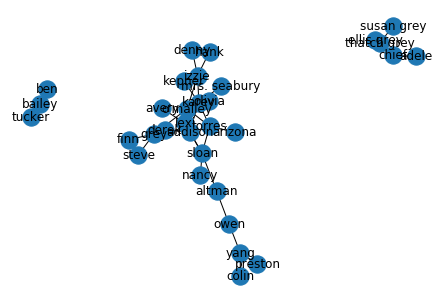

In [129]:
nx.draw_spring(GAAdj, with_labels=True)

#### Are the two graphs the same? 

In [130]:
# Easiest, least robust way to see whether the two graphs are the same:
print("Edge List Graph\n", nx.info(GA))
print("\nAdj. Matrix Graph\n", nx.info(GAAdj))

Edge List Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250

Adj. Matrix Graph
 Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


In [131]:
# Fancy math way that checks additional conditions
#like if all the same nodes are connected and the edges are the same
print("Isomorphic?", nx.is_isomorphic(GA, GAAdj))

Isomorphic? True


### Gotchas

In [132]:
#If we want to print out the edges of a node, say 'denny'
#we can call it using the dictionary notation
#with the graph name as the dictionary, and node name in []
#If you call it from adjaceny matrix though it will also display the weight
print("'denny' From Edge List Graph:", GA['denny'])
print("'denny' From Adjacency Matrix Graph:", GAAdj['denny'])

'denny' From Edge List Graph: {'izzie': {}}
'denny' From Adjacency Matrix Graph: {'izzie': {'weight': 1.0}}


⚠️ __Observation__: Edge weights are inferred from adjacency matrix

In [133]:
#source and target are ambiguously defined in an undirected graph
#we can test that these are different by converting the graph to an edgelist
#graphs are the same, but it doesn't mean that the edgelists are
#we're sorting the edgelists by the first column
#which is the edgelist's source
original_edgelist = sorted(nx.to_edgelist(GA))
adjacency_edgelist = sorted(nx.to_edgelist(GAAdj))
#go through each of those sorted lists
#if the source is different between the two sorted lists point the mismatch out
#we can see that the egelists didn't have everyone in the same order as the source because 
#they put that source as the target since it doesn't really matter
for i, edge in enumerate(original_edgelist):
    adjacency_edge = adjacency_edgelist[i]
    if edge[0] != adjacency_edge[0]:
        print("Sorted Edge Mismatch at edge %s:" % i, edge, adjacency_edge)
        break

Sorted Edge Mismatch at edge 0: ('bailey', 'ben', {}) ('adele', 'chief', {'weight': 1.0})


⚠️  __Observation__: Source and Target are ambiguously defined in undirected graphs

### Exporting Graphs
We'll export the graph in `GEXF` (Graph Exchange XML Format).

In [134]:
nx.write_gexf(GA, 'ga_graph.gexf')

# Visualizing Graphs

- Basic NetworkX & Matplotlib (`nx.draw`)
- Detailed Plotting w/ Networkx & Matplotlib
    - Plotting attributes
    
<center><img src="https://i2.wp.com/flowingdata.com/wp-content/uploads/2015/07/Disney-strategy-chart-from-1957.jpg" width="540"></center>

Vizualizing networks is a complicated problem -- how do you position the nodes and edges in a way such that no nodes overlap, connected nodes are near each other, none of the labels overlap? Typically we use what is called a *layout* to plot or visualize networks. A layout is an algorithm used to position nodes and edges on a plot automatically in aesthetically and informationally satisfactory ways.

There are several different layout algorithms, but the most common is a *force-directed* layout. These layout algorithms are based off of physical repulsion and spring systems. In general, the rule for force-directed layouts is: repel all nodes, and model connections between nodes as 'springs', with the result that more connected nodes will be closer together.

One important issue is that each layout typically has random initial conditions. Running a plot function twice will return two different plots, both following the rules of the algorithm, but differing due to the initial conditions of the layout.

In [135]:
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

In [137]:
#reading in the graph file
#(the same one that we exported above)
GA = nx.read_gexf('ga_graph.gexf')
print(nx.info(GA))

Name: 
Type: Graph
Number of nodes: 32
Number of edges: 34
Average degree:   2.1250


## NetworkX with Matplotlib

Pros:
- Easy
- Some customization

Cons:
- Looks "dated" (not great for publication / productizing)
- Not interactive
- Few Layout Options

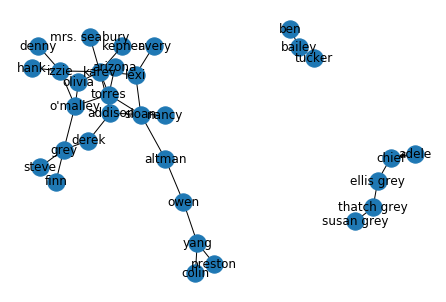

In [138]:
# Easiest Way
nx.draw(GA, with_labels=True)
#with larger graphs the text will probably get in the way
#so we'll likely want to turn it off

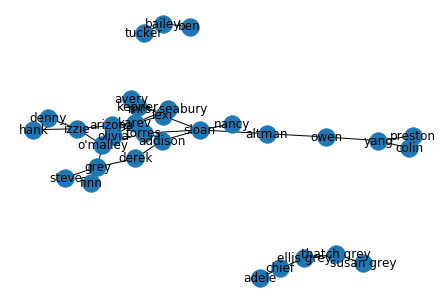

In [139]:
# Graph Layouts are random...
#this is why rerunning the same code and data twice
#leads to graphs that look different even though they all follow the same rules
#does make replication harder with these algorithms
nx.draw(GA, with_labels=True)

## NetworkX Detailed Plotting

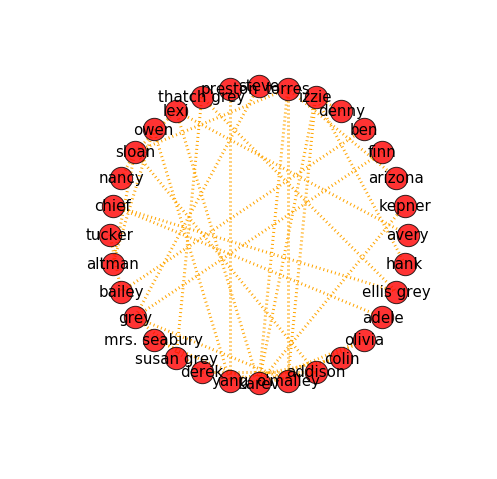

In [5]:
# Some matplotlib options
plt.figure(figsize=(8,8))
plt.axis('off')

# generate the layout and place nodes and edges
layout = nx.circular_layout(GA)

# plot nodes, labels, and edges with options
nx.draw_networkx_nodes(GA, pos=layout, node_size=500, alpha=0.8)
nx.draw_networkx_edges(GA, pos=layout, width=3, style='dotted',
                       edge_color='orange')
nx.draw_networkx_labels(GA, pos=layout, font_size=15)

plt.show()

## Detailed Plotting with Colors by Attribute

In [6]:
from seaborn import color_palette, set_style, palplot

In [7]:
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'izzie' : 'alive',
    'mrs. seabury' : 'alive',
    'ben' : 'alive',
    'grey' : 'alive',
    'sloan' : 'dead',
    'steve' : 'alive',
    'kepner' : 'alive',
    'colin' : 'alive',
    'avery' : 'alive',
    'bailey' : 'alive',
    'chief' : 'alive',
    'preston' : 'alive',
    'ellis grey' : 'dead',
    "o'malley" : 'dead',
    'lexi' : 'dead',
    'torres' : 'alive',
    'yang' : 'alive',
    'addison' : 'alive',
    'olivia' : 'alive',
    'altman' : 'alive',
    'denny' : 'dead',
    'arizona' : 'alive',
    'adele' : 'dead',
    'derek' : 'dead',
    'nancy' : 'alive',
    'thatch grey' : 'alive',
    'susan grey' : 'dead',
    'owen' : 'alive',
    'tucker' : 'alive',
    'finn' : 'alive'
}

![spoiler alert](http://funnyand.com/wp-content/uploads/2014/09/Spoiler-Alert.jpg)
``` python
dead_or_alive = {
    'karev' : 'alive',
    'hank' : 'alive',
    'sloan' : 'dead',
    ...
    'finn' : 'alive'
    }
``` 

In [8]:
# apply the dead_or_alive mapping of desceased characters

nx.set_node_attributes(GA, 'status', dead_or_alive)

In [9]:
def create_color_map(G, attribute, seaborn_palette="colorblind"):
    """Return a list of hex color mappings for node attributes"""
    attributes = [G.node[label][attribute] for label in G.nodes()]

    # get the set of possible attributes
    attributes_unique = list(set(attributes))
    num_values = len(attributes_unique)

    # generate color palette from seaborn
    palette = color_palette(seaborn_palette, num_values).as_hex()

    # create a mapping of attribute to color
    color_map = dict(zip(attributes_unique, palette))

    # map the attribute for each node to the color it represents
    node_colors = [color_map[attribute] for attribute in attributes]

    return node_colors, color_map, palette

In [10]:
node_colors, color_map, palette = create_color_map(GA, 'status')

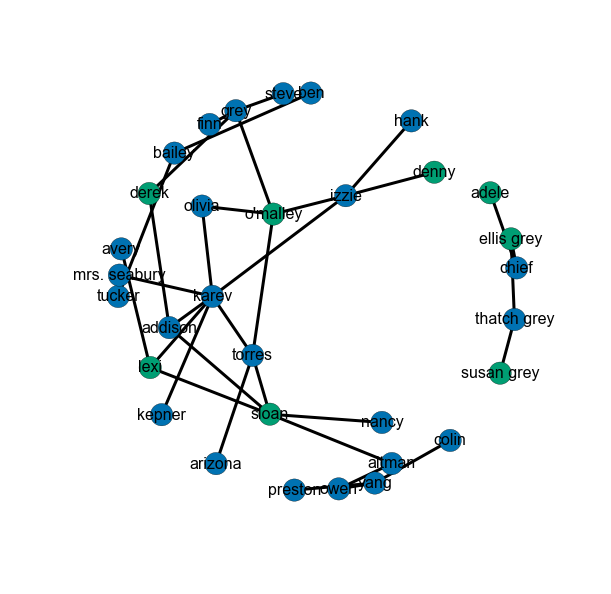

{'alive': '#0072b2', 'dead': '#009e73'}


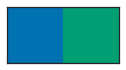

In [11]:
set_style('white')
plt.figure(figsize=(10,10))
plt.axis('off')

layout = nx.spring_layout(GA)
nx.draw_networkx_nodes(GA, layout, node_color=node_colors, node_size=500)
nx.draw_networkx_labels(GA, pos=layout, font_size=16)
nx.draw_networkx_edges(GA, layout, width=3)

plt.show()

# legend
print(color_map)
palplot(palette)

## Other Visualization Options
- [Plot.ly](https://plot.ly/ipython-notebooks/network-graphs/#)
- [d3](https://bl.ocks.org/mbostock/4062045)
- [Gephi](https://gephi.org/)
- [Cytoscape / cyREST](https://github.com/idekerlab/vizbi-2015)
- [python-igraph](http://igraph.org/python/)